Notes from here:
http://www.ams.org/publicoutreach/feature-column/fcarc-henon

How I understand it.

$
H: (x, y) \rightarrow (y, 1 - ay^{2} + bx)
$

In Henon's original paper, this map occurred as a discrete approximation (Poincare return map) of a certain complicated 3D flow.

The map $H$ is one of the simplest possible nonlinear 2D transformations.

1. What is the long-term behaviour of a given point when $H$ is repeatedly applied to it?

2. How does this behaviour vary as the point is varied?

3. How do the answers of the above questions vary as the parameters $a$ and $b$ are varied?

In [1]:
%reset -f

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a = 1.4
b = 0.3

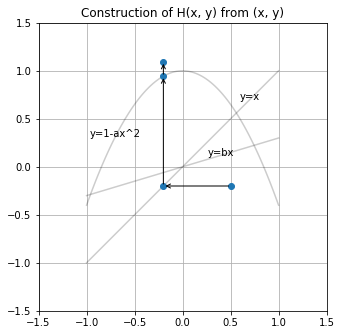

In [4]:
xline = np.linspace(-1, 1, 101)
yline_1 = b*xline
yline_2 = 1 - a*xline*xline
#---
x = 0.5
y = -0.2
#---
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect("equal")
#---
ax.plot(xline, xline, "k-", alpha=0.2)
ax.plot(xline, yline_1, "k-", alpha=0.2)
ax.plot(xline, yline_2, "k-", alpha=0.2)
#---
ax.plot(x, y, "C0o")
ax.plot(y, y, "C0o")
ax.plot(y, 1 - a*y*y, "C0o")
ax.plot(y, 1 - a*y*y + b*x, "C0o")
#---
ax.annotate("", xy=(y, y), xytext=(x, y), color="r",
            arrowprops=dict(arrowstyle="->"))

ax.annotate("", xy=(y, 1 - a*y*y), xytext=(y, y), color="r",
            arrowprops=dict(arrowstyle="->"))

ax.annotate("", xy=(y, 1 - a*y*y + b*x), xytext=(y, 1 - a*y*y), color="r",
            arrowprops=dict(arrowstyle="->"))
#---
ax.text(0.4, b*0.4, "y=bx", ha="center")
ax.text(0.7, 0.7, "y=x", ha="center")
ax.text(-0.7, 1-a*(-0.7)**2, "y=1-ax^2", ha="center")
#---
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
#---
ax.title.set_text("Construction of H(x, y) from (x, y)")
#---
ax.grid()
plt.show()

---

The following shows how a box of ICs evolves after one iteration of $H$:

In [5]:
def HenonMapFn_P1(x, y, a, b):
    return (y, y)

In [6]:
def HenonMapFn_P2(x, y, a, b):
    return (y, (1 - a*y*y) )

In [7]:
def HenonMapFn_P3(x, y, a, b):
    return (y, (1 - a*y*y + b*x) )

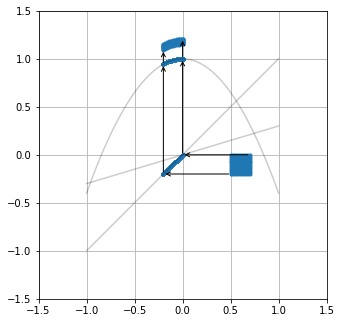

In [8]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect("equal")
#---
for x0 in np.linspace(0.5, 0.7, 11):
    for y0 in np.linspace(-0.2, 0.0, 11):
        ax.plot(x0, y0, "C0.")
        #---
        x1, y1 = HenonMapFn_P1(x0, y0, a, b)
        ax.plot(x1, y1, "C0.")
        #---
        x2, y2 = HenonMapFn_P2(x0, y0, a, b)
        ax.plot(x2, y2, "C0.")
        #---
        x3, y3 = HenonMapFn_P3(x0, y0, a, b)
        ax.plot(x3, y3, "C0.")
#---
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
#---
ax.plot(xline, xline, "k", alpha=0.2)
ax.plot(xline, yline_1, "k", alpha=0.2)
ax.plot(xline, yline_2, "k", alpha=0.2)
#---
x1 = 0.5; x2 = 0.7
y1 = -0.2; y2 = 0.0

ax.annotate("", xy=(y1, y1), xytext=(x1, y1), color="r",
            arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(y2, y2), xytext=(x2, y2), color="r",
            arrowprops=dict(arrowstyle="->"))

ax.annotate("", xy=(y1, 1 - a*y1*y1), xytext=(y1, y1), color="r",
            arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(y2, 1 - a*y2*y2), xytext=(y2, y2), color="r",
            arrowprops=dict(arrowstyle="->"))

ax.annotate("", xy=(y1, 1 - a*y1*y1 + b*x1),
            xytext=(y1, 1 - a*y1*y1), color="r",
            arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(y2, 1 - a*y2*y2 + b*x2),
            xytext=(y2, 1 - a*y2*y2), color="r",
            arrowprops=dict(arrowstyle="->"))
#---
ax.grid()
plt.show()

For the given parameter values (i.e. $a=1.4$, $b=0.3$), the operation of $H$ will take an IC to infinity or to an odd-looking curve known as a strange attractor.

---

The following shows how a box of ICs evolves over time, ie 2000 iterations:

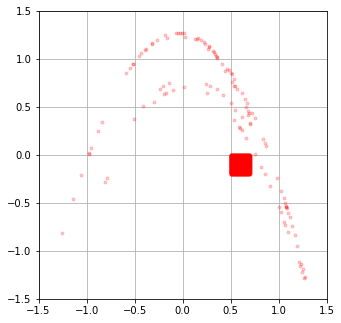

CPU times: user 11.1 s, sys: 90.8 ms, total: 11.2 s
Wall time: 11.3 s


In [9]:
%%time
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect("equal")
#---
for x0 in np.linspace(0.5, 0.7, 51):
    for y0 in np.linspace(-0.2, 0.0, 51):
        ax.plot(x0, y0, "r.", alpha=0.2)
#---
for x0 in np.linspace(0.5, 0.7, 11):
    for y0 in np.linspace(-0.2, 0.0, 11):
        xn, yn = x0, y0
        for ii in range(2000):
            xn, yn = HenonMapFn_P3(xn, yn, a, b)
#             print (x0, y0, ii)
        ax.plot(xn, yn, "r.", alpha=0.2)
#---
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
#---
ax.grid()
plt.show()

---

The following shows the evolution of IC $(x, y) = (0, 0)$:

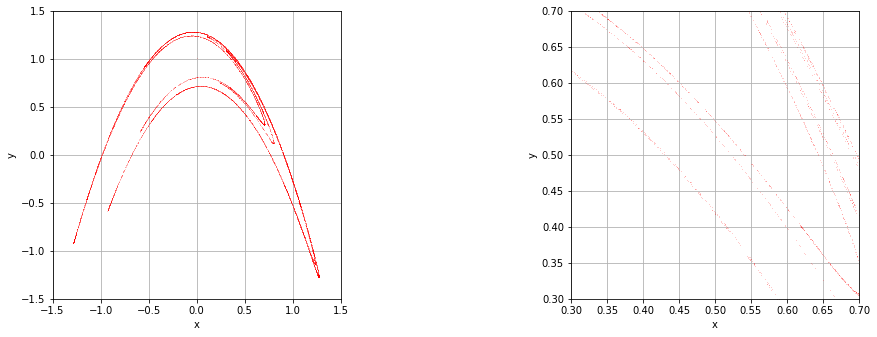

CPU times: user 3min 26s, sys: 1.36 s, total: 3min 28s
Wall time: 3min 29s


In [10]:
%%time
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_aspect("equal")
#---
ax2 = fig.add_axes([1.2, 0, 1, 1])
ax2.set_aspect("equal")
#---
xn, yn = 0.0, 0.0
for ii in range(10000):
    xn, yn = HenonMapFn_P3(xn, yn, a, b)
    ax1.plot(xn, yn, "r,", alpha=0.2)
    ax2.plot(xn, yn, "r,", alpha=0.2)
#---
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
#---
ax2.set_xlim([0.3, 0.7])
ax2.set_ylim([0.3, 0.7])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
#---
ax1.grid()
ax2.grid()
plt.show()

The above curve obtained is known as a strange attractor. It is suggested that there is a very complicated fine structure to the attracting curve.

Basin of attraction:
<br>
Not all points will be attracted to the Henon attractor.
<br>
The writer of the blog doesn't know any way to tell whether an IC is actually attracted to the strange attractor, or if it escapes far away in a reasonable point of time.

Below, the black region has ICs that do not lead to the strange attractor in a reasonable amount of time (i.e. 100 iterations). And, the white portion has ICs that do not escape away in a reasonably short time.

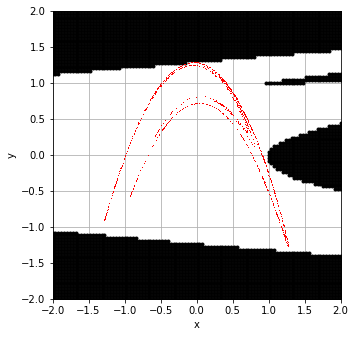

CPU times: user 24.5 s, sys: 309 ms, total: 24.8 s
Wall time: 25.2 s


In [11]:
%%time
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect("equal")
#---
for x0 in np.linspace(-2, 2, 101):
    for y0 in np.linspace(-2, 2, 101):
        xn, yn = x0, y0
        for ii in range(100):
            xn, yn = HenonMapFn_P3(xn, yn, a, b)
            if abs(xn)>2.5:
                ax.plot(x0, y0, "k.")
                break
#---
xList = [0.0]
yList = [0.0]
for ii in range(1000):
    xtemp, ytemp = HenonMapFn_P3(xList[ii], yList[ii], a, b)
    xList.append(xtemp)
    yList.append(ytemp)
ax.plot(xList[100:], yList[100:], "r,")
#---
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel("x")
ax.set_ylabel("y")
#---
ax.grid()
plt.show()

So, we can say that the ICs in the white region should approximate the basin of attraction of the Henon attractor.

Apparently, the shape of the basin changes drastically as parameters $a$ and $b$ change.

Consider the case when $a=1.5$, $b=0.2$.

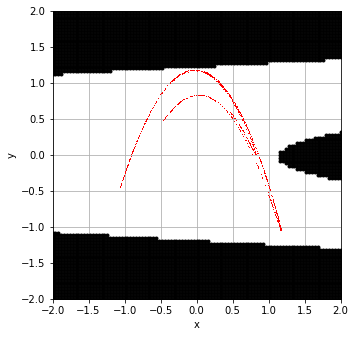

CPU times: user 23.3 s, sys: 102 ms, total: 23.4 s
Wall time: 23.5 s


In [12]:
%%time
#---
a1 = 1.5
b1 = 0.2
#---
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect("equal")
#---
for x0 in np.linspace(-2, 2, 101):
    for y0 in np.linspace(-2, 2, 101):
        xn, yn = x0, y0
        for ii in range(100):
            xn, yn = HenonMapFn_P3(xn, yn, a1, b1)
            if abs(xn)>2.5:
                ax.plot(x0, y0, "k.")
                break
#---
xList = [0.0]
yList = [0.0]
for ii in range(1000):
    xtemp, ytemp = HenonMapFn_P3(xList[ii], yList[ii], a1, b1)
    xList.append(xtemp)
    yList.append(ytemp)
ax.plot(xList[100:], yList[100:], "r,")
#---
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel("x")
ax.set_ylabel("y")
#---
ax.grid()
plt.show()

---

Knowing tha basin suggests another way to approximate the attractor itself.
<br>
First, construct a quadrilateral that covers the attractor and lies inside the basin of attraction. Iterate the map on this region, and see what happens...

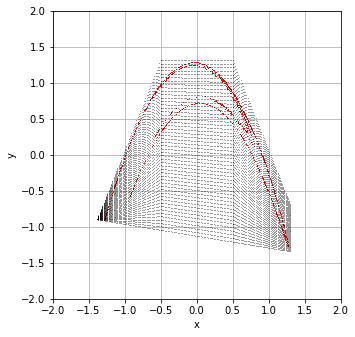

CPU times: user 58.9 s, sys: 263 ms, total: 59.2 s
Wall time: 59.3 s


In [14]:
%%time
#---
xBasin = []
yBasin = []
#---
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect("equal")
#---
xList = [0.0]
yList = [0.0]
for ii in range(1000):
    xtemp, ytemp = HenonMapFn_P3(xList[ii], yList[ii], a, b)
    xList.append(xtemp)
    yList.append(ytemp)
ax.plot(xList[100:], yList[100:], "r,")
#---
m1 = -0.165; b1 = 6.9
m2 = 2.5; b2 = 1.02
m3 = -2.5; b3 = -1.02
#---
# NumPts = 101
NumPts = 51
#---
for x0 in np.linspace(-1.38, -0.5, NumPts):
    for y0 in np.linspace(m1*(x0 + b1), m2*(x0 + b2), NumPts):
        ax.plot(x0, y0, "k,", alpha=0.4)
        xBasin.append(x0)
        yBasin.append(y0)
#---
for x0 in np.linspace(-0.5, 0.5, NumPts):
    for y0 in np.linspace(m1*(x0 + b1), 1.3, NumPts):
        ax.plot(x0, y0, "k,", alpha=0.4)
        xBasin.append(x0)
        yBasin.append(y0)
#---
for x0 in np.linspace(0.5, 1.3, NumPts):
    for y0 in np.linspace(m1*(x0 + b1), m3*(x0 + b3), NumPts):
        ax.plot(x0, y0, "k,", alpha=0.4)
        xBasin.append(x0)
        yBasin.append(y0)
#---
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel("x")
ax.set_ylabel("y")
#---
ax.grid()
plt.show()

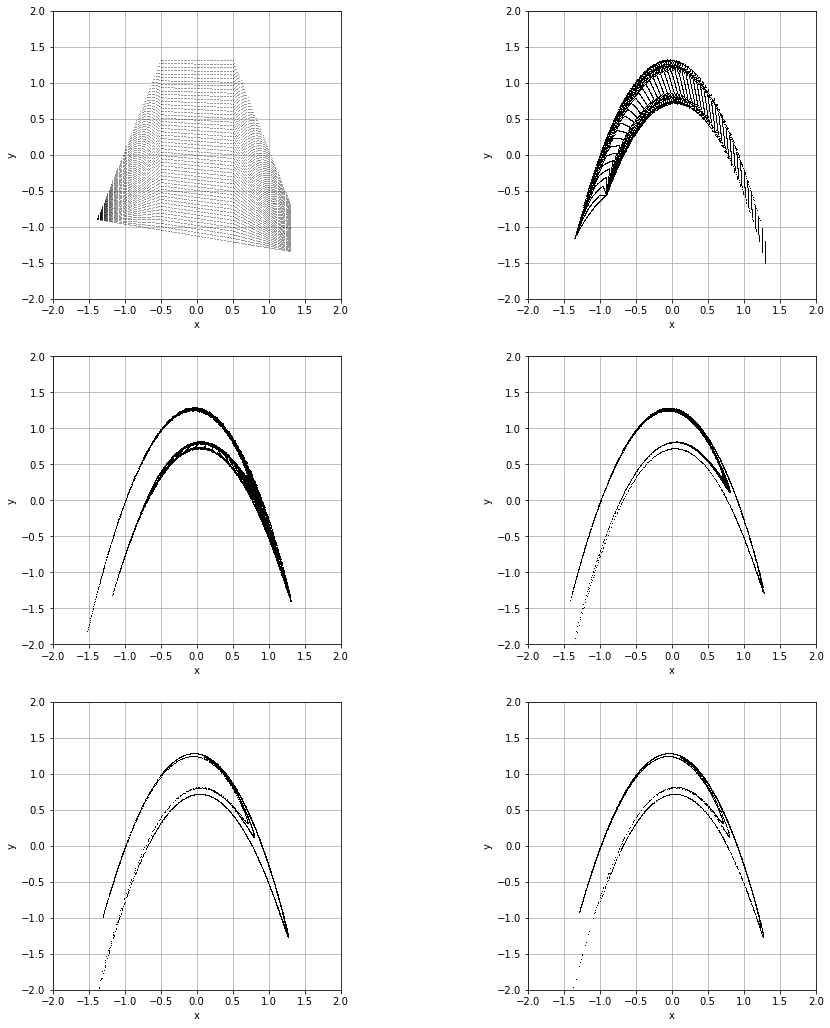

CPU times: user 7min 5s, sys: 1.91 s, total: 7min 7s
Wall time: 7min 8s


In [32]:
%%time
#---
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_aspect("equal")
#---
ax1 = fig.add_axes([1.1, 0, 1, 1])
ax1.set_aspect("equal")
#---
ax2 = fig.add_axes([0, -1.2, 1, 1])
ax2.set_aspect("equal")
#---
ax3 = fig.add_axes([1.1, -1.2, 1, 1])
ax3.set_aspect("equal")
#---
ax4 = fig.add_axes([0, -2.4, 1, 1])
ax4.set_aspect("equal")
#---
ax5 = fig.add_axes([1.1, -2.4, 1, 1])
ax5.set_aspect("equal")
#---
m1 = -0.165; b1 = 6.9
m2 = 2.5; b2 = 1.02
m3 = -2.5; b3 = -1.02
#---
# NumPts = 101
NumPts = 51
#---
for x0 in np.linspace(-1.38, -0.5, NumPts):
    for y0 in np.linspace(m1*(x0 + b1), m2*(x0 + b2), NumPts):
        ax.plot(x0, y0, "k,", alpha=0.4)
        #---
        x1, y1 = HenonMapFn_P3(x0, y0, a, b)
        ax1.plot(x1, y1, "k,")
        #---
        x2, y2 = HenonMapFn_P3(x1, y1, a, b)
        ax2.plot(x2, y2, "k,")
        #---
        x3, y3 = HenonMapFn_P3(x2, y2, a, b)
        ax3.plot(x3, y3, "k,")
        #---
        x4, y4 = HenonMapFn_P3(x3, y3, a, b)
        ax4.plot(x4, y4, "k,")
        #---
        x5, y5 = HenonMapFn_P3(x4, y4, a, b)
        ax5.plot(x5, y5, "k,")
#---
for x0 in np.linspace(-0.5, 0.5, NumPts):
    for y0 in np.linspace(m1*(x0 + b1), 1.3, NumPts):
        ax.plot(x0, y0, "k,", alpha=0.4)
        #---
        x1, y1 = HenonMapFn_P3(x0, y0, a, b)
        ax1.plot(x1, y1, "k,")
        #---
        x2, y2 = HenonMapFn_P3(x1, y1, a, b)
        ax2.plot(x2, y2, "k,")
        #---
        x3, y3 = HenonMapFn_P3(x2, y2, a, b)
        ax3.plot(x3, y3, "k,")
        #---
        x4, y4 = HenonMapFn_P3(x3, y3, a, b)
        ax4.plot(x4, y4, "k,")
        #---
        x5, y5 = HenonMapFn_P3(x4, y4, a, b)
        ax5.plot(x5, y5, "k,")
#---
for x0 in np.linspace(0.5, 1.3, NumPts):
    for y0 in np.linspace(m1*(x0 + b1), m3*(x0 + b3), NumPts):
        ax.plot(x0, y0, "k,", alpha=0.4)
        #---
        x1, y1 = HenonMapFn_P3(x0, y0, a, b)
        ax1.plot(x1, y1, "k,")
        #---
        x2, y2 = HenonMapFn_P3(x1, y1, a, b)
        ax2.plot(x2, y2, "k,")
        #---
        x3, y3 = HenonMapFn_P3(x2, y2, a, b)
        ax3.plot(x3, y3, "k,")
        #---
        x4, y4 = HenonMapFn_P3(x3, y3, a, b)
        ax4.plot(x4, y4, "k,")
        #---
        x5, y5 = HenonMapFn_P3(x4, y4, a, b)
        ax5.plot(x5, y5, "k,")
#---
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
#---
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid()
#---
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid()
#---
ax3.set_xlim([-2, 2])
ax3.set_ylim([-2, 2])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.grid()
#---
ax4.set_xlim([-2, 2])
ax4.set_ylim([-2, 2])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.grid()
#---
ax5.set_xlim([-2, 2])
ax5.set_ylim([-2, 2])
ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.grid()
#---
plt.show()